In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px


pd.options.display.float_format='{:,.2f}'.format
data=pd.read_csv('zoopla_edinburgh.csv')
data.index.rename('property_index',inplace=True)
data.shape

(2233, 14)

In [20]:
#Converting string data to datetime.date


data['available_from']=pd.to_datetime(data['available_from'],errors='coerce')
data['available_from']=data['available_from'].dt.date
data['incorporation_date']=pd.to_datetime(data['incorporation_date'],errors='coerce')
data['incorporation_date']=data['incorporation_date'].dt.date



In [21]:
#Brief analysis about number of letting agents 
#and number of properties available to rent

number_of_agents=data['letting_agent_name'].value_counts().count()
number_of_properties=data['letting_agent_name'].value_counts().sum()
print('Number of agents: {}'.format(number_of_agents))
print('Number of properties: {}'.format(number_of_properties))

Number of agents: 121
Number of properties: 2228


In [22]:
#Market share in % for the 10 biggest agencies
market_share=data['letting_agent_name'].value_counts().head(10)/data['letting_agent_name'].value_counts().sum()
market_share=market_share.rename('Market share by agency. First 10 agencies')
market_share

OpenRent                                     0.20
Homelike Internet GmbH                       0.13
Braemore Sales and Lettings                  0.06
DJ Alexander Lettings Ltd                    0.04
Southside Property Management                0.04
Murray & Currie Property                     0.04
Grant Property                               0.04
Staykeepers                                  0.03
Zone Letting Limited                         0.02
Northwood Residential Lettings (Edinburgh)   0.02
Name: Market share by agency. First 10 agencies, dtype: float64

<AxesSubplot:ylabel='Frequency'>

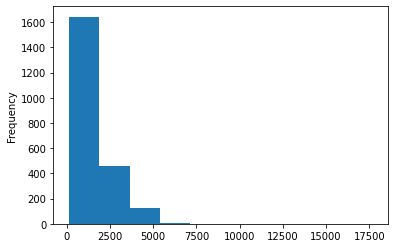

In [23]:
#First histogram of rent prices

data['price'].plot(kind='hist')

#Most of the properties have rents below 2500pcm

Text(0.5, 1.0, 'Distribution of rent (properties below 2500 pcm) [pcm]')

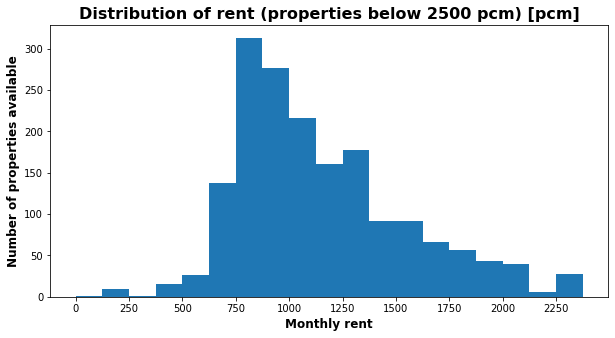

In [24]:
#Histogram with rents below 2500pcm

fig,ax=plt.subplots(figsize=(10,5))

data_less_2500=data[data['price']<=2500]

ax.hist(data_less_2500['price'],bins=np.arange(0,2500,125))
ax.set_xticks(np.arange(0,2500,250))
ax.set_xlabel('Monthly rent',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Distribution of rent (properties below 2500 pcm) [pcm]',
fontsize=16,fontweight='heavy')

#There is a huge offer for properties from above 750pcm

C:\Users\usuario\AppData\Local\Temp/ipykernel_1696/392459060.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\usuario\AppData\Local\Temp/ipykernel_1696/392459060.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Waiting time distribution [days]')

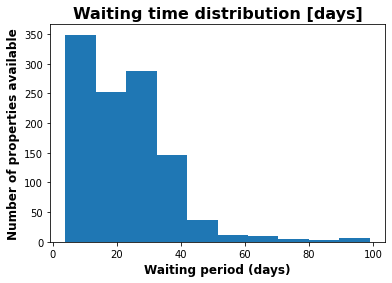

In [25]:
fig,ax=plt.subplots()

data_with_no_na=data[data['available_from'].notna()]
data_with_no_na['waiting_period_days']=data_with_no_na['available_from']-data_with_no_na['incorporation_date']
data_with_no_na['waiting_period_days']=data_with_no_na['waiting_period_days'].apply(lambda x: x.days)
waiting_period_days_after_3_days=data_with_no_na.query("waiting_period_days<100 & waiting_period_days>3")['waiting_period_days']


ax.hist(waiting_period_days_after_3_days)
ax.set_xlabel('Waiting period (days)',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Waiting time distribution [days]',fontsize=16,fontweight='heavy')



Let's do the same analysis segmenting by different types of properties and prices

In [26]:
#Splitting the properties in four different segments accoirding to their price

data_500_1000=data.query('price>500 & price<=1000')
data_1000_1500=data.query('price>1000 & price<=1500')
data_1500_2000=data.query('price>1500 & price<=2000')
data_2000_3000=data.query('price>2000 & price<=3000')

data_with_no_na_500_1000=data_with_no_na.query('price>500 & price<=1000')
data_with_no_na_1000_1500=data_with_no_na.query('price>1000 & price<=1500')
data_with_no_na_1500_2000=data_with_no_na.query('price>1500 & price<=2000')
data_with_no_na_2000_3000=data_with_no_na.query('price>2000 & price<=3000')

Text(0.5, 0, 'Availability (2000-3000pcm) [days]')

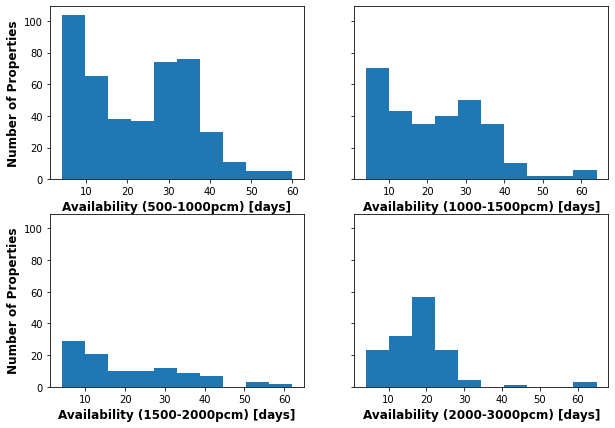

In [27]:
fig,ax=plt.subplots(2,2,figsize=(10,7),sharey=True)
ax[0,0].hist(data_with_no_na_500_1000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[0,1].hist(data_with_no_na_1000_1500.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[1,0].hist(data_with_no_na_1500_2000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[1,1].hist(data_with_no_na_2000_3000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])

ax[0,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')
ax[1,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')

ax[0,0].set_xlabel('Availability (500-1000pcm) [days]',fontsize=12,fontweight='heavy')
ax[0,1].set_xlabel('Availability (1000-1500pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,0].set_xlabel('Availability (1500-2000pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,1].set_xlabel('Availability (2000-3000pcm) [days]',fontsize=12,fontweight='heavy')

#Seems that in most cases the properties are available to be taken in the first 30 days,
#except for the properties above 2000pcm. The waiting time is under 20 days for most of them

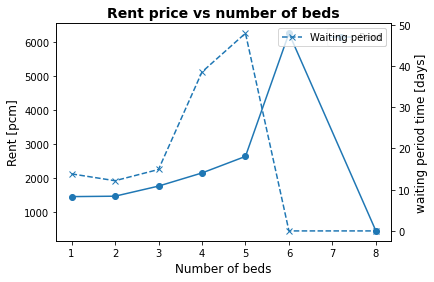

In [28]:
data_by_beds=data_with_no_na.groupby('number_of_beds')[['price','waiting_period_days']].agg({'price':['count','mean'],'waiting_period_days':'mean'})

fig,ax=plt.subplots()
ax.plot(data_by_beds.index,data_by_beds['price']['mean'],linestyle='-',marker='o',label='Rent')
ax.set_xlabel('Number of beds',fontsize=12)
ax.set_ylabel('Rent [pcm]',fontsize=12)
ax.set_title('Rent price vs number of beds',fontsize=14,fontweight='heavy')
ax.legend(loc=1)
ax2=ax.twinx()
ax2.plot(data_by_beds.index,data_by_beds['waiting_period_days']['mean'],linestyle='--',marker='x',label='Waiting period')
ax2.set_ylabel('waiting period time [days]',fontsize=12)
ax2.legend(loc=0)

In [29]:
data_by_beds

price          waiting_period_days
               count     mean                mean
number_of_beds                                   
1.00             867 1,465.18               13.83
2.00             848 1,477.55               12.17
3.00             324 1,773.15               14.90
4.00              73 2,158.55               38.55
5.00              34 2,643.50               47.94
6.00               5 6,253.00                0.00
8.00               1   460.00                0.00

Text(0.5, 1.0, 'Rent price vs number of baths')

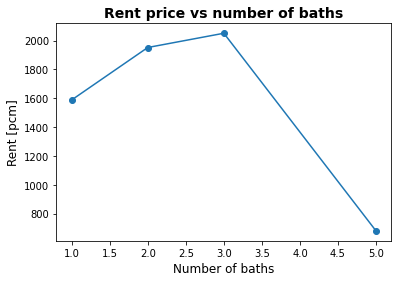

In [30]:
data_by_baths=data_with_no_na.groupby('number_of_baths')[['price','waiting_period_days']].agg({'price':['count','mean'],'waiting_period_days':'mean'})
fig,ax=plt.subplots()
ax.plot(data_by_baths.index,data_by_baths['price']['mean'],linestyle='-',marker='o')
ax.set_xlabel('Number of baths',fontsize=12)
ax.set_ylabel('Rent [pcm]',fontsize=12)
ax.set_title('Rent price vs number of baths',fontsize=14,fontweight='heavy')

Text(0.5, 0, 'Date')

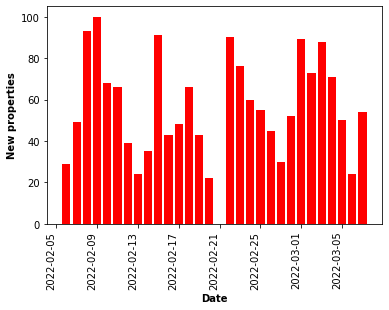

In [31]:
#day_names=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#day_index=[day_names[x.weekday()] for x in data.groupby('incorporation_date').count()['price'].index.to_list()]
plt.bar(data.groupby('incorporation_date').count()['price'][1:].index,data.groupby('incorporation_date').count()['price'][1:],linestyle='--',
color='r',linewidth=5)
plt.xticks(rotation=90,ha='right')
plt.ylabel('New properties',fontweight='heavy')
plt.xlabel('Date',fontweight='heavy')


In [32]:
data.columns

Index(['address', 'available_from', 'description', 'features', 'images',
       'incorporation_date', 'letting_agent_name', 'number_of_baths',
       'number_of_beds', 'price', 'property_url', 'title', 'latitude',
       'longitude'],
      dtype='object')

In [33]:
"""
app=Nominatim(user_agent="tutorial")
location=app.geocode("Nairobi,Kenya").raw['lat']
location
"""

'\napp=Nominatim(user_agent="tutorial")\nlocation=app.geocode("Nairobi,Kenya").raw[\'lat\']\nlocation\n'

In [34]:
""" 
unlocated=[]
success=0
for i in range(0,10):
        try:
                location=app.geocode(data['address'].iloc[i]).raw
                print('index: {} --- address: {} --- latitude: {} --- longitude: {}'.format(i,data['address'].iloc[i],location['lat'],location['lon']))
                success+=1
        except:
                unlocated.append(data['address'].iloc[i])
print("% succesfully located {}".format(success/10*100))
"""

' \nunlocated=[]\nsuccess=0\nfor i in range(0,10):\n        try:\n                location=app.geocode(data[\'address\'].iloc[i]).raw\n                print(\'index: {} --- address: {} --- latitude: {} --- longitude: {}\'.format(i,data[\'address\'].iloc[i],location[\'lat\'],location[\'lon\']))\n                success+=1\n        except:\n                unlocated.append(data[\'address\'].iloc[i])\nprint("% succesfully located {}".format(success/10*100))\n'

In [35]:
data.columns

Index(['address', 'available_from', 'description', 'features', 'images',
       'incorporation_date', 'letting_agent_name', 'number_of_baths',
       'number_of_beds', 'price', 'property_url', 'title', 'latitude',
       'longitude'],
      dtype='object')

In [42]:
#The most expensive areas for Edinburgh are Stockbridge, Dean Village, New and Old towns and Marchmont. This is more clear 
#when we see the map for properties with two rooms.

mapbox_token='pk.eyJ1IjoibWFudWVsanUwMDEiLCJhIjoiY2wxNWg5ejRyMDNhbjNjcXN6c3M3Y295ZyJ9.M-0-2YFows2S3c4VYvF24Q'

data_1400=data.query('price<=1400 & price>500 & number_of_beds==1')
px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(data_1400,lat=data_1400['latitude'],lon=data_1400['longitude'],hover_name=data_1400['price'],zoom=10,
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        color='price')
fig.show()

In [77]:
data_2000=data.query('price<=2000 & price>500 & number_of_beds==2')
px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(data_2000,lat=data_2000['latitude'],lon=data_2000['longitude'],hover_name=data_2000['price'],zoom=10,
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        color='price')
fig.show()

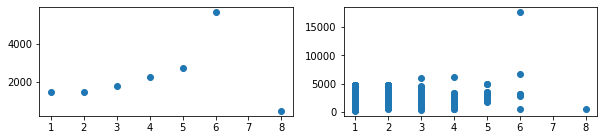

In [69]:
#The price actually does not change with the number of rooms. The average increases but there is a great dispersion which 
#makes it meaningless
fig,ax=plt.subplots(1,2,figsize=(10,2),sharey=True)
ax[0].scatter(data.groupby('number_of_beds').mean().index,data.groupby('number_of_beds').mean()['price'])
ax[1].scatter(data['number_of_beds'],data['price'])


In [75]:
#import seaborn as sns
#sns.pairplot(data)